In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
df = pd.DataFrame(pd.read_csv(r'C:\Users\sever\OneDrive\Masaüstü\Reproducible Research Project\CarPrice.csv'))
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sever\\OneDrive\\Masaüstü\\Reproducible Research Project\\CarPrice.csv'

In [3]:
df.info()
df.price.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

C:\Users\bilgi\AppData\Local\Temp/ipykernel_11852/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<AxesSubplot:xlabel='price', ylabel='Density'>

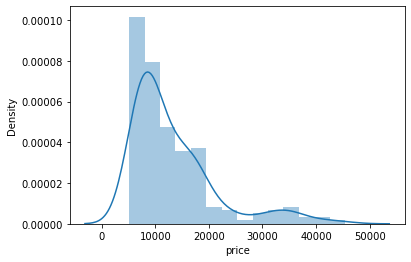

In [4]:
sns.distplot(df['price'])

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s(diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [6]:
df['CarName'] = df['CarName'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['CarName'] = df['CarName'].replace(['MAXDA'], 'MAZDA')
df['CarName'] = df['CarName'].replace(['PORCSHCE'], 'PORSCHE')
df['CarName'] = df['CarName'].replace(['TOYOUTA'], 'TOYOTA')

In [7]:
sum(df.duplicated(subset = 'car_ID')) == 0

True

In [8]:
df.isnull().sum()*100/df.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [9]:
df.drop(columns=["car_ID"])

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,0,audi 5000s(diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [10]:
df.price = df.price.round(2)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.00
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.00
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.00
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.00
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.00
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.00
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.00
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.00
9,10,0,audi 5000s(diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.17


In [11]:
df.CarName.values[0:10]
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()
df['model'] = df.CarName.str.split(' ').str.get(1).str.upper()
len(set(df.brand.values))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.00,ALFA,ROMERO
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.00,ALFA,ROMERO
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.00,ALFA,ROMERO
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.00,AUDI,100LS
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.00,AUDI,100LS
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.00,AUDI,FOX
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.00,AUDI,100LS
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.00,AUDI,5000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.00,AUDI,4000
9,10,0,audi 5000s(diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.17,AUDI,5000S(DIESEL)


In [12]:
def isNaN(num):
    return num != num


In [13]:
df['PriceType'] = df['price'].apply(lambda x : "Low Range" if x < 5000 
                                                     else ("Mid Range" if 10000 <= x < 20000
                                                        else "High Range" if 20000 <= x < 30000
                                                           else "Luxury"))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model,PriceType
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.00,ALFA,ROMERO,Mid Range
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.00,ALFA,ROMERO,Mid Range
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.00,ALFA,ROMERO,Mid Range
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.00,AUDI,100LS,Mid Range
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.00,AUDI,100LS,Mid Range
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.00,AUDI,FOX,Mid Range
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.00,AUDI,100LS,Mid Range
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.00,AUDI,5000,Mid Range
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.00,AUDI,4000,High Range
9,10,0,audi 5000s(diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.17,AUDI,5000S(DIESEL),Mid Range


In [14]:
df['RiskRate'] = df['symboling'].apply(lambda x : "High Risk" if x > 1 
                                                     else ("Medium Risk" if 0 <= x < 2
                                                        else "Low Risk"))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model,PriceType,RiskRate
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.00,ALFA,ROMERO,Mid Range,High Risk
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.00,ALFA,ROMERO,Mid Range,High Risk
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.00,ALFA,ROMERO,Mid Range,Medium Risk
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.00,AUDI,100LS,Mid Range,High Risk
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.00,AUDI,100LS,Mid Range,High Risk
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.00,AUDI,FOX,Mid Range,High Risk
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.00,AUDI,100LS,Mid Range,Medium Risk
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.00,AUDI,5000,Mid Range,Medium Risk
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.00,AUDI,4000,High Range,Medium Risk
9,10,0,audi 5000s(diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.17,AUDI,5000S(DIESEL),Mid Range,Medium Risk


In [48]:
def isNa(num):
    return num != num


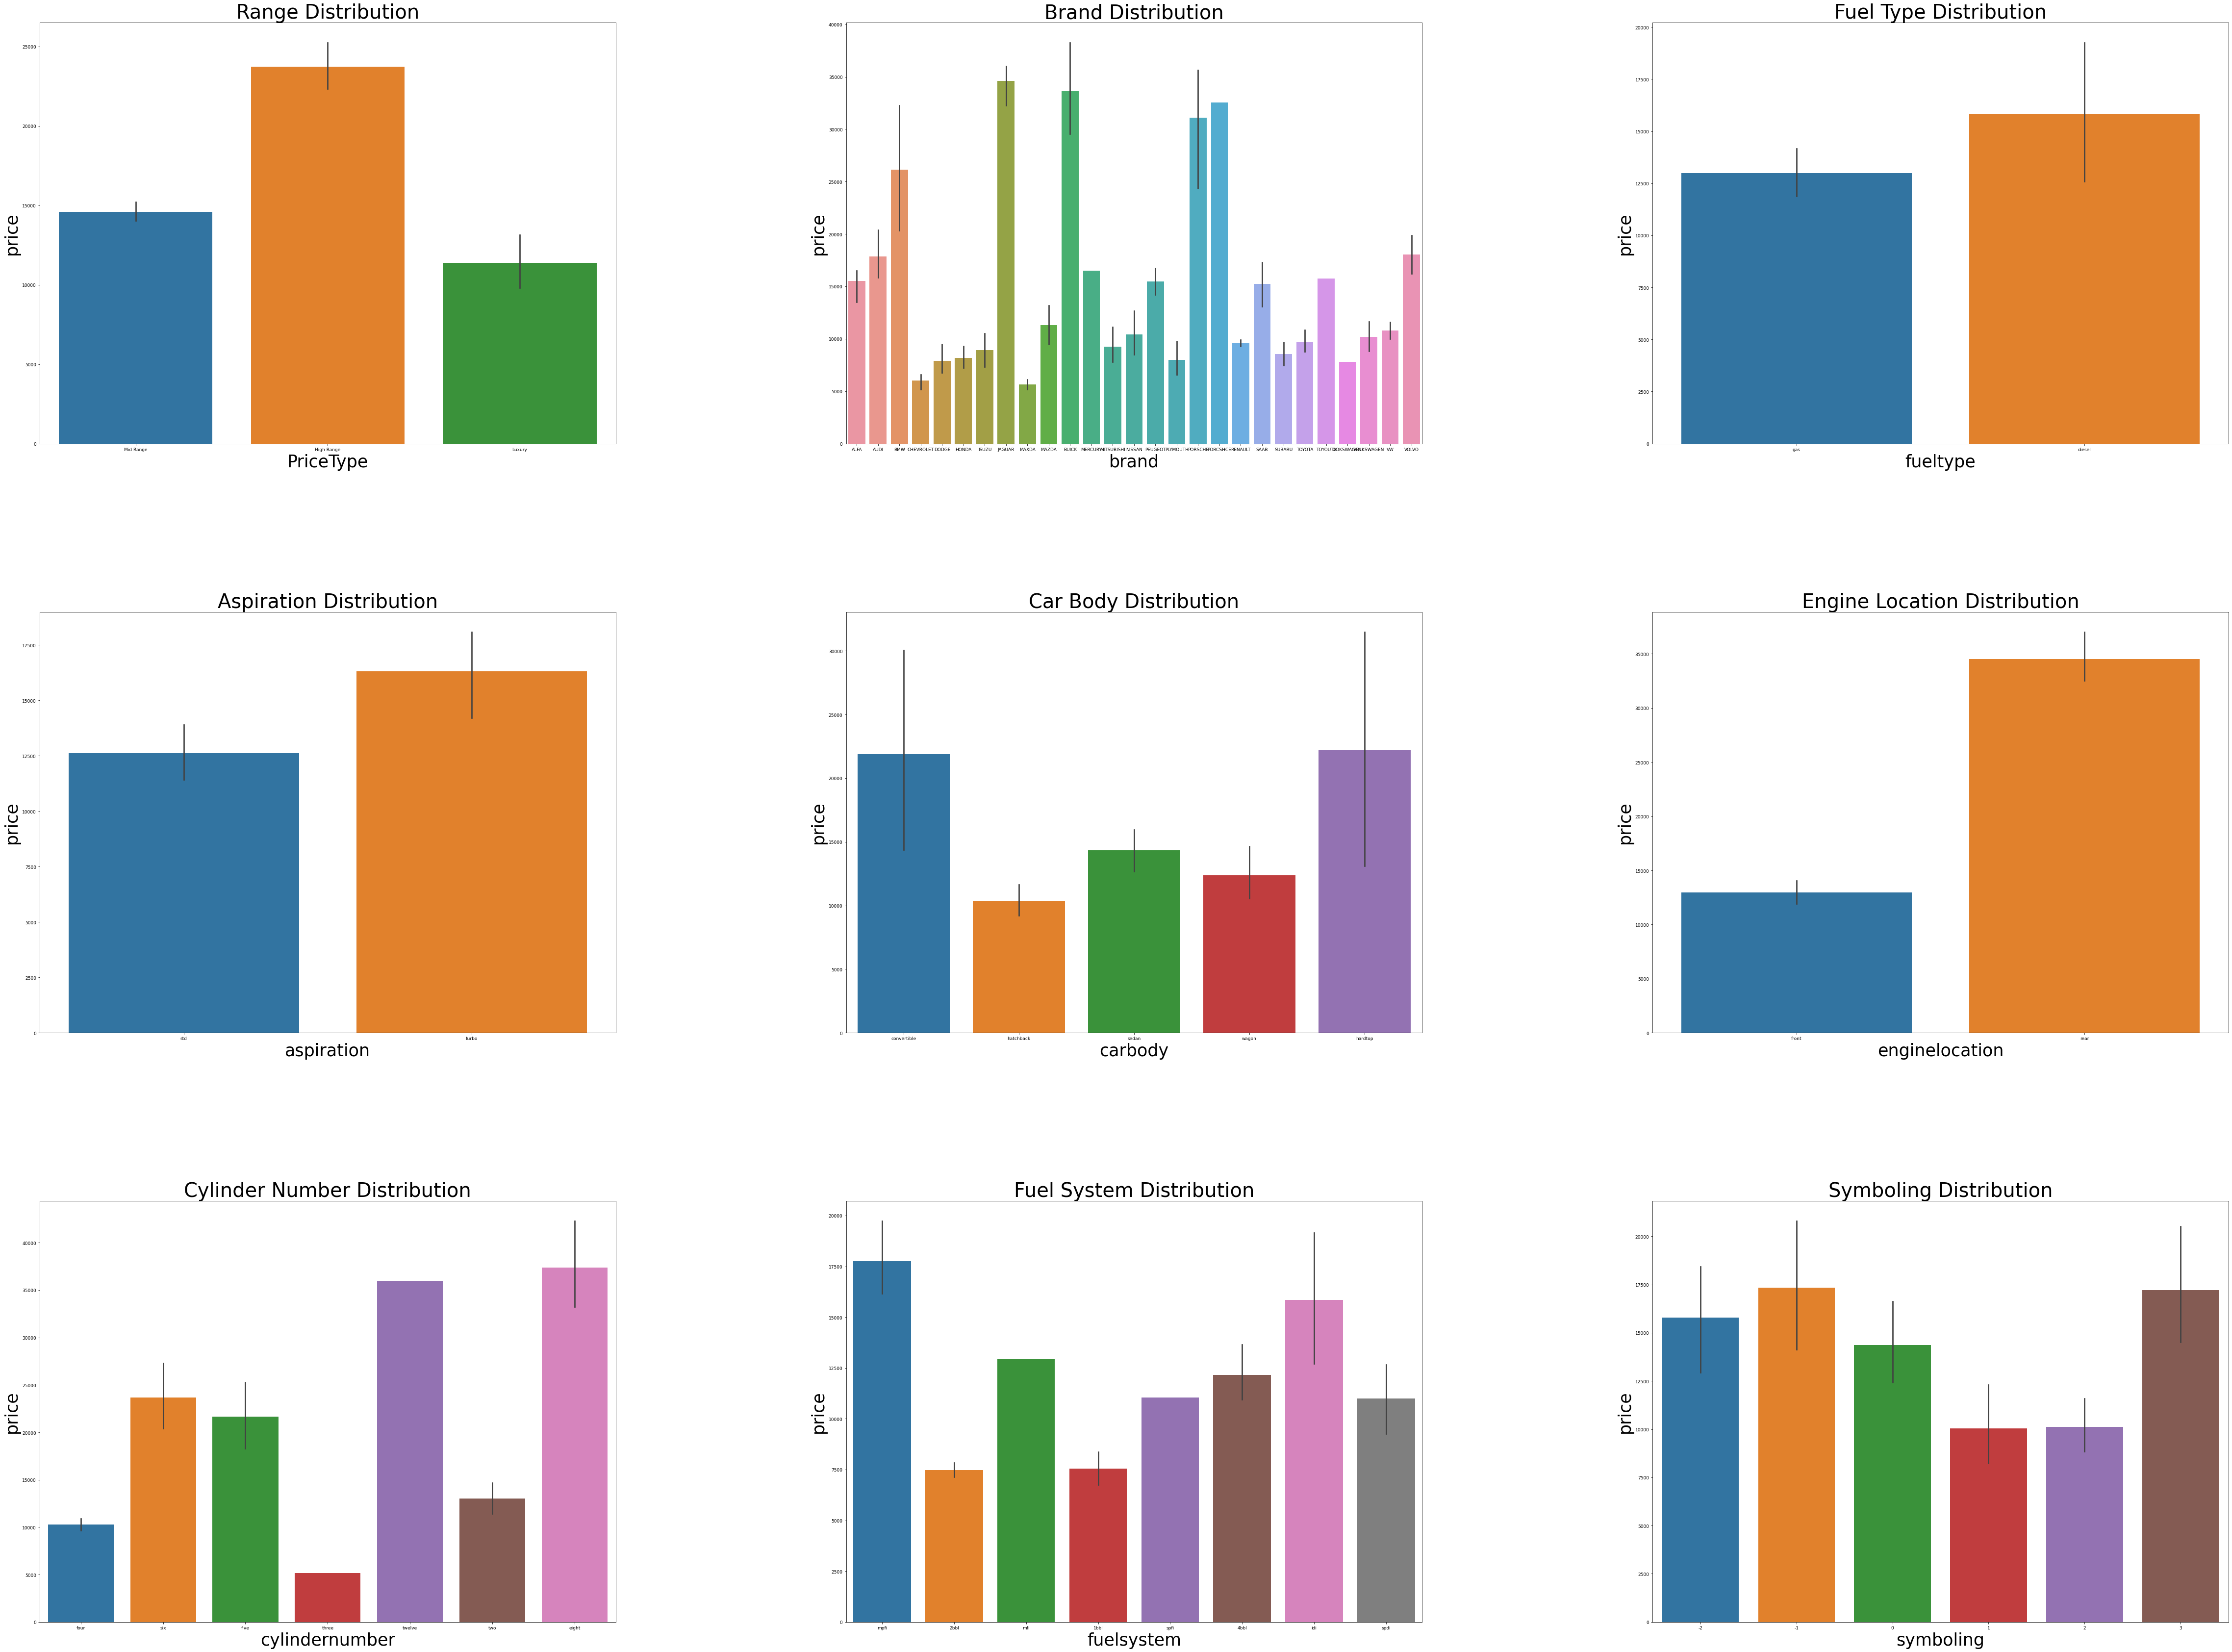

In [72]:
fig, axes = plt.subplots(3, 3, figsize=(80, 60))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

charts = [
    {'title': "Range Distribution", 'x': 'PriceType', 'y': 'price'},
    {'title': "Brand Distribution", 'x': 'brand', 'y': 'price'},
    {'title': "Fuel Type Distribution", 'x': 'fueltype', 'y': 'price'},
    {'title': "Aspiration Distribution", 'x': 'aspiration', 'y': 'price'},
    {'title': "Car Body Distribution", 'x': 'carbody', 'y': 'price'},
    {'title': "Engine Location Distribution", 'x': 'enginelocation', 'y': 'price'},
    {'title': "Cylinder Number Distribution", 'x': 'cylindernumber', 'y': 'price'},
    {'title': "Fuel System Distribution", 'x': 'fuelsystem', 'y': 'price'},
    {'title': "Symboling Distribution", 'x': 'symboling', 'y': 'price'},
    {'title': "Risk Rate Distribution", 'x': 'RiskRate', 'y': 'price'}
]

counter = 0

for i in range(3):
    for j in range(3):
        if counter < len(charts):
            chart = charts[counter]
            plt.subplot(3, 3, counter+1)
            plt.title(chart['title'], fontsize=40)
            sns.barplot(x=chart['x'], y=chart['y'], data=df)
            plt.xlabel(chart['x'], fontsize=35)
            plt.ylabel(chart['y'], fontsize=35)
        else:
            axes[i, j].axis('off')
        counter += 1


plt.rcParams['figure.figsize'] = (190, 180)

plt.show()


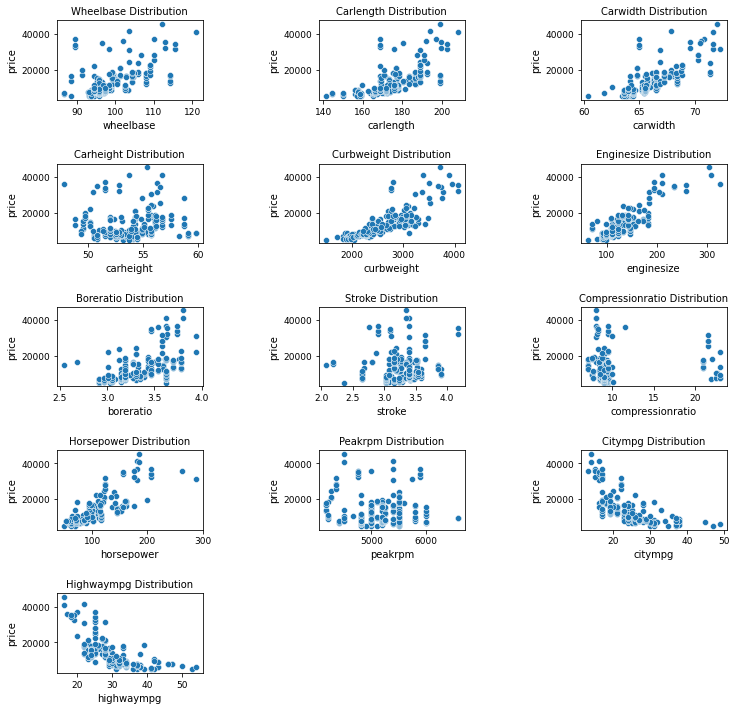

In [73]:

columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
           'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
           'citympg', 'highwaympg']


num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)

for i, col in enumerate(columns):
    row = i // num_cols
    col = df[col]  
    
    ax = axes[row, i % num_cols]
    ax.set_title(col.name.capitalize() + " Distribution")
    sns.scatterplot(x=col, y='price', data=df, ax=ax)


if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        fig.delaxes(axes[-1, j])


plt.show()


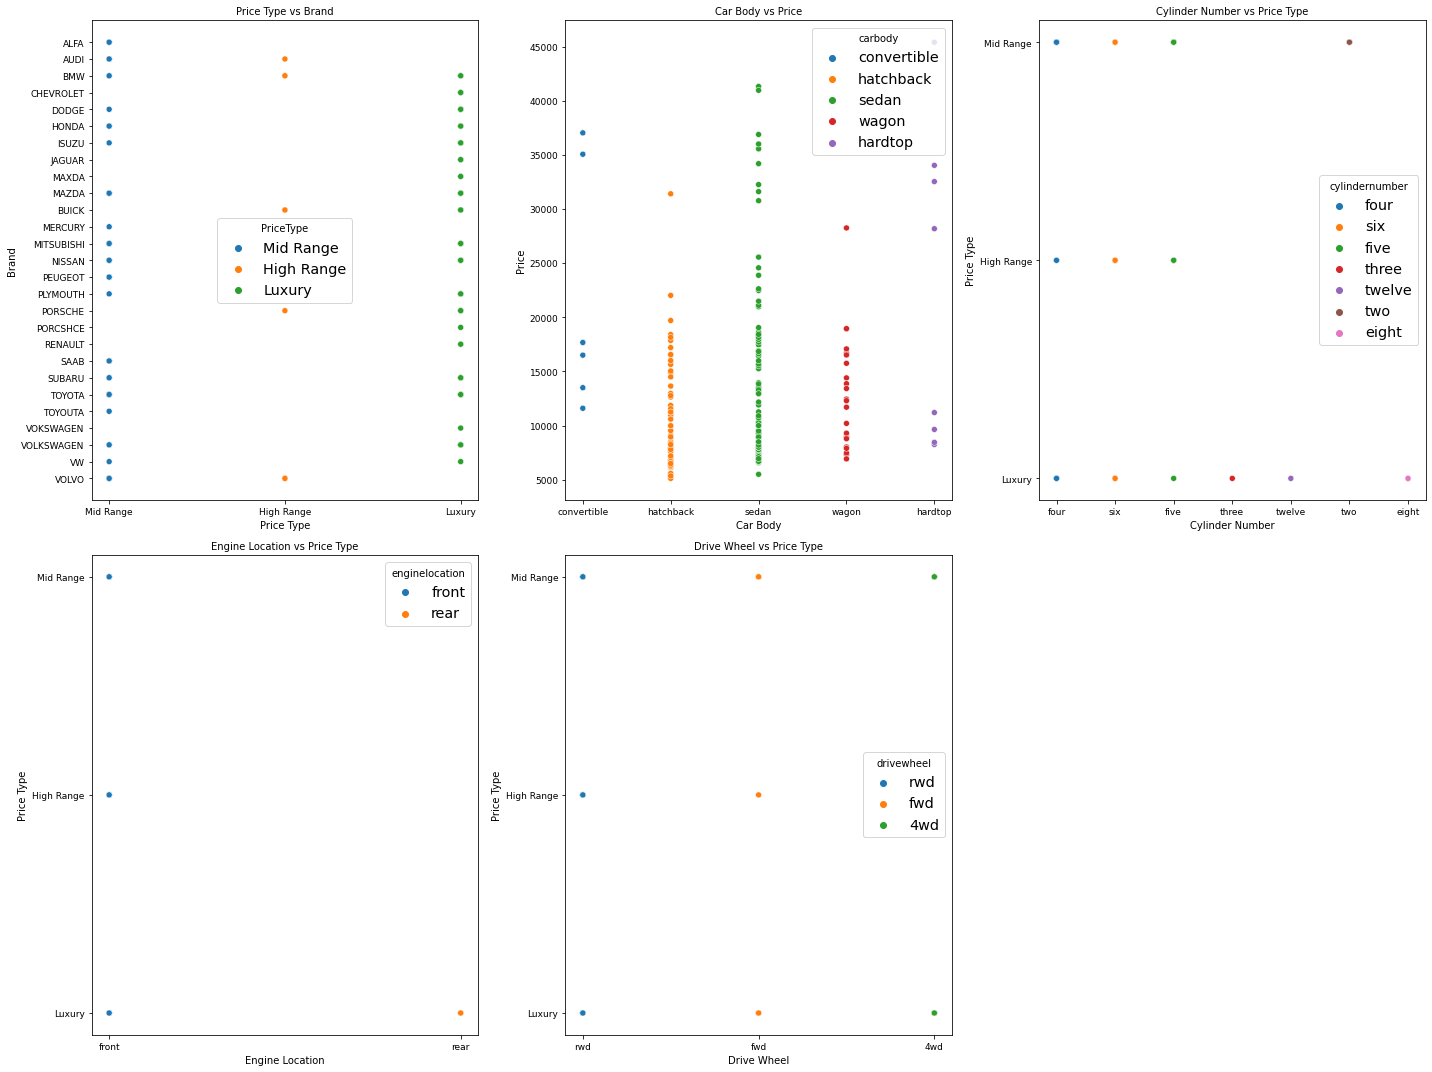

In [42]:
plt.figure(figsize=(20, 15))

num_rows = 2
num_cols = 3

for i, (x, y, hue, xlabel, ylabel) in enumerate([
    ('PriceType', 'brand', 'PriceType', 'Price Type', 'Brand'),
    ('carbody', 'price', 'carbody', 'Car Body', 'Price'),
    ('cylindernumber', 'PriceType', 'cylindernumber', 'Cylinder Number', 'Price Type'),
    ('enginelocation', 'PriceType', 'enginelocation', 'Engine Location', 'Price Type'),
    ('drivewheel', 'PriceType', 'drivewheel', 'Drive Wheel', 'Price Type')
]):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(f"{xlabel} vs {ylabel}")
    sns.scatterplot(x=x, y=y, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


plt.tight_layout()

plt.show()


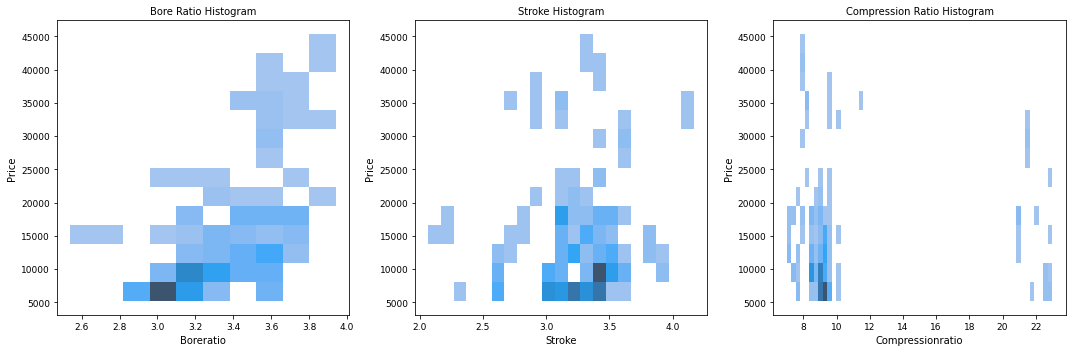

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plots = [
    {'title': 'Bore Ratio Histogram', 'x': 'boreratio'},
    {'title': 'Stroke Histogram', 'x': 'stroke'},
    {'title': 'Compression Ratio Histogram', 'x': 'compressionratio'}
]

for i, plot in enumerate(plots):
    ax = axes[i]
    ax.set_title(plot['title'])
    sns.histplot(x=plot['x'], y='price', data=df, ax=ax)
    ax.set_xlabel(plot['x'].capitalize())
    ax.set_ylabel('Price')

plt.tight_layout()

plt.show()


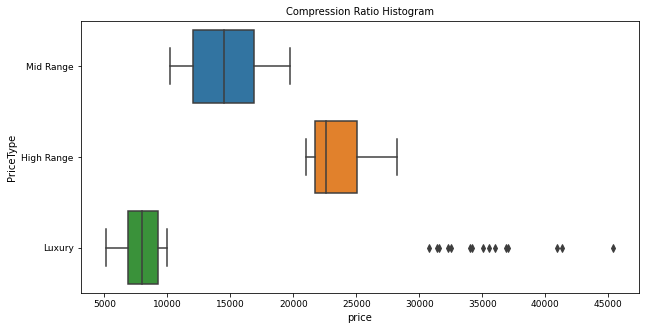

In [45]:
plt.figure(figsize=(10,5))
plt.title("Compression Ratio Histogram")
sns.boxplot(x = 'price', y = 'PriceType', data = df)
plt.show()

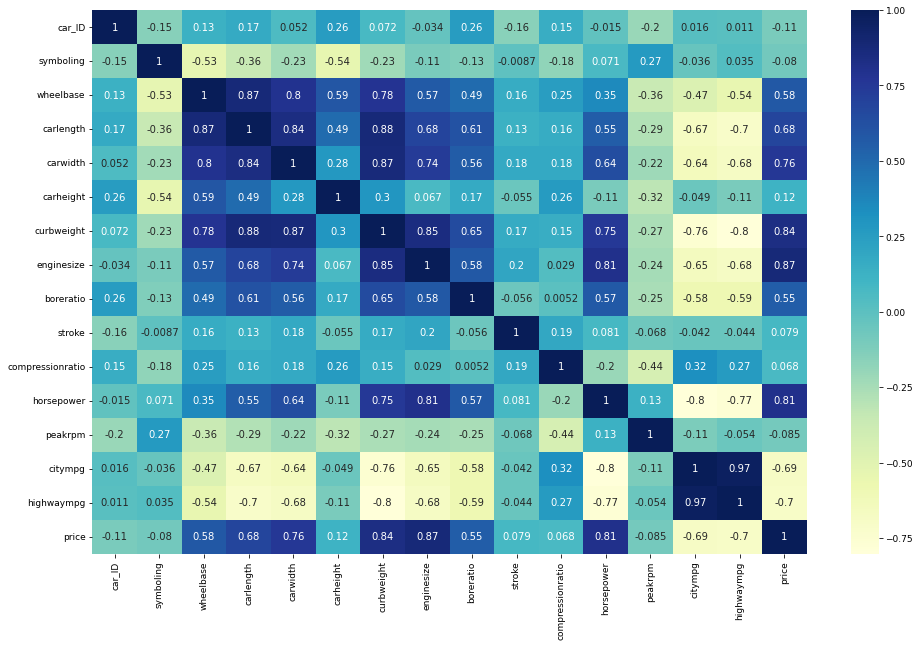

In [44]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()